<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span></li><li><span><a href="#Names-and-Saves" data-toc-modified-id="Names-and-Saves-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Names and Saves</a></span></li><li><span><a href="#Finding-Just-Significant-Points" data-toc-modified-id="Finding-Just-Significant-Points-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Finding Just Significant Points</a></span></li><li><span><a href="#GeoPlot" data-toc-modified-id="GeoPlot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GeoPlot</a></span><ul class="toc-item"><li><span><a href="#One-Percentile" data-toc-modified-id="One-Percentile-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>One Percentile</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Just-Sig" data-toc-modified-id="Just-Sig-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Just Sig</a></span></li></ul></li><li><span><a href="#Both-Percentile" data-toc-modified-id="Both-Percentile-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Both Percentile</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Plots</a></span></li></ul></li></ul></li><li><span><a href="#PDF's" data-toc-modified-id="PDF's-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PDF's</a></span></li><li><span><a href="#Stippling" data-toc-modified-id="Stippling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stippling</a></span></li></ul></div>

# Preamble



* <b> data_50 </b> and <b> bootdata_50 </b>

In [2]:
import xarray as xr
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from dask.diagnostics import ProgressBar
import matplotlib.colors as colors
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

rb = plt.cm.RdBu
bm = plt.cm.Blues

In [5]:
import os
cwd = os.getcwd()

cwd = cwd + '/'
cwd

# This is the index you wil be selecting: 'count','int','prop'
name = 'count'

directory = cwd + 'data/'
directory

'''Normal'''
data = xr.open_dataset(directory + name + '_data.nc')
sig_data = xr.open_dataset(directory + name + '_sig.nc')

'/home/563/ab2313/MJO/extreme_plots/'

In [12]:
'''ENSO'''

data_enso = xr.open_dataset(directory + name + '_data_enso.nc')
sig_data_enso = xr.open_dataset(directory + name + '_sig_enso.nc')

In [202]:
sig_data 

<xarray.Dataset>
Dimensions:     (lat: 53, lon: 178, mjo: 3, month: 6, percentile: 2)
Coordinates:
  * lat         (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -10.5 -10.25 -10.0
  * lon         (lon) float64 112.0 112.2 112.5 112.8 ... 155.8 156.0 156.2
  * month       (month) int64 10 11 12 1 2 3
  * mjo         (mjo) object 'enhanced' 'suppressed' 'inactive'
  * percentile  (percentile) object '90' '95'
Data variables:
    precip      (percentile, mjo, month, lat, lon) float64 ...

In [13]:
sig_data_enso

<xarray.Dataset>
Dimensions:     (enso: 2, lat: 53, lon: 178, mjo: 3, month: 6, percentile: 3)
Coordinates:
  * mjo         (mjo) object 'enhanced' 'suppressed' 'inactive'
  * month       (month) int64 1 2 3 10 11 12
  * lon         (lon) float64 112.0 112.2 112.5 112.8 ... 155.8 156.0 156.2
  * lat         (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -10.5 -10.25 -10.0
  * enso        (enso) object 'el nino' 'la nina'
  * percentile  (percentile) object '50' '90' '95'
Data variables:
    precip      (percentile, enso, mjo, month, lat, lon) float64 ...

In [14]:
# This is the name that will appear in the plot title
names = {'count':'Count','int':'Intensity','prop':'Proportion'}
index = names[name]
index

'Count'

In [15]:
def return_plotname(percentile, sig = 0):
    if name == 'count':
        geoplot_name = 'Change in the Number of Rainfall Events > ' + percentile + 'th Percentile'
    elif name == 'int':
        geoplot_name = 'Change in the Intensity of the ' + percentile + 'th Percentile'
    else:
        geoplot_name = 'Change in the Proportion of Rainfall Events > ' + percentile + 'th Percentile'
        
    if sig == 0:
        geoplot_name = geoplot_name + ' (insig)'
    
    return geoplot_name

In [24]:
save_dir = cwd + 'plots/' + name + '/'
save_dir

'/home/563/ab2313/MJO/extreme_plots/plots/count/'

# GeoPlot

### Single

In [17]:
import matplotlib.colors as pltc
from pylab import cm
from matplotlib.colors import BoundaryNorm


def geo_plot_all_phases_single(plot_data,  month,vmax ,title = '',
               save_fig = 0, dont_plot = 0, plot_inactive = 1):
    
    vmin = 1/vmax

    plot_data = plot_data.where(plot_data.precip >= vmin, np.nan)

    
    
    plot_data = plot_data.where(plot_data.precip != 1, np.nan)
    '------Setting up the Plot'
    
    # Getting the right dimensions for both plots
    if plot_inactive:
        height = 12
    else:
        height = 8
    fig = plt.figure(figsize = (15,height))
    
    title_size = 15
    row_nums = 2 + plot_inactive
    

    month_name = dt.date(2015, int(month), 1).strftime('%B')
    title = month_name + " : " + title
    fig.suptitle(title, fontsize = 20)
    
    
    '''Color Bar #1'''

    '--------'
    # These are the range of values to take
    l1 = np.array([1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.2,2.4,2.6,2.8,3])
    l2 = 1/l1 # The decimal values are the inverse of these values
    l2 = np.flip(l2) # Need to order them in the right direction
    levels = np.concatenate((l2,np.array([1]),l1)) # Combining them all together and adding 1 into the middle
    levels = levels[np.where(np.logical_and(levels <= vmax, levels >= vmin))] # Only want the values in vmin
    # and vmax

    # Selecting a color bar that has the number of descrete levels as we have choesen above

    custom_RdBu = cm.get_cmap("RdBu",len(levels))(np.arange(len(levels)))
    
    # Turning this back into a color bar
    cmap_custom_RdBu = pltc.LinearSegmentedColormap.from_list("RdWtBu", custom_RdBu, len(levels))
    
    
    
    

    '-------Plotting the Data'
    # 1 month of data
    plot_data = plot_data.sel(month = month)
    
    
    enso_phases = ['el nino', 'la nina']
    if plot_inactive == 1:
        mjo_phases = ['enhanced', 'suppressed', 'inactive']
    else:
        mjo_phases = ['enhanced', 'suppressed']
    
    plot_num = 1
    for mjo in mjo_phases:

            
        # Creating an axis to plot on
        ax = fig.add_subplot(row_nums,1,plot_num, projection = ccrs.PlateCarree())

        # Selecting the data the is to be plotted
        sub_data = plot_data.sel( mjo = mjo).precip
        plot = sub_data.plot(ax = ax,  cmap = cmap_custom_RdBu, 
                             vmin = vmin , vmax = vmax,
                             add_colorbar = False,
                             norm = BoundaryNorm(levels, len(levels)-1)) 
        ax.coastlines(resolution = '50m')

    

  
        ax.set_title('')
                
                
        plot_num += 1  

   
        
    '''------Color Bar #2'''

    # This addes in a seperate axis for the color bar: x,y,width, height
    cax = fig.add_axes([.3, 0.87, 0.4,0.03])
    
    
    # These are the range of different locatins for ticks that I want
    tick_labels = np.array([0.33334, 0.5, 0.666666666,
                            1, 1.5 , 2, 3 ])
    tick_labels = np.array(tick_labels)
    # The string versin
    tick_strings = np.array(['0.33', '0.5', '0.67',
                            '1', '1.5' , '2' , '3' ])
    
    # Finding the strings and labels in the range that I need
    
    tick_strings = tick_strings[np.where(np.logical_and(tick_labels <= vmax, tick_labels >= vmin))]
    tick_labels = tick_labels[np.where(np.logical_and(tick_labels <= vmax, tick_labels >= vmin))]
    
    # The actual plot
    cbar = plt.colorbar(plot, cax = cax,orientation = 'horizontal',drawedges = True, ticks = tick_labels)

    # Adding the strings as the tick labels
    cbar.ax.set_xticklabels(tick_strings) 
    cbar.set_label('Change'
                  , fontsize = 12, labelpad = 10)    
    
    
    '''------- Finishing Touches'''
    fig.tight_layout(rect=[0, 0.03, 1, 0.8]) # Ensures that bits don't get clipped, and makes the shape better
    
    
    # This is adding the Row labels:
    
    # DIfferent height is need for the plots with and without the inactive phase. The numbers are form 
    # trial and error
    if plot_inactive == 1:
        yheight = 2.65
        yminus = 1.05
        
    else:

        
        yheight = 1.5
        yminus = 1
    for phase in mjo_phases:
    
        plt.text(-0.1, yheight, phase.capitalize(), horizontalalignment='center', verticalalignment='center',
                 transform=ax.transAxes, fontsize = 20)
        yheight -= yminus

    
    #####
    if save_fig:
        directory = save_dir + 'vanilla/'
        fig.savefig(directory + title + '.png',bbox_inches = 'tight', dpi = 300)
        print('saved ---- ' + title)
    ####
    # This will not plot usefull if you just want to save
    if dont_plot:
        plt.close(fig)

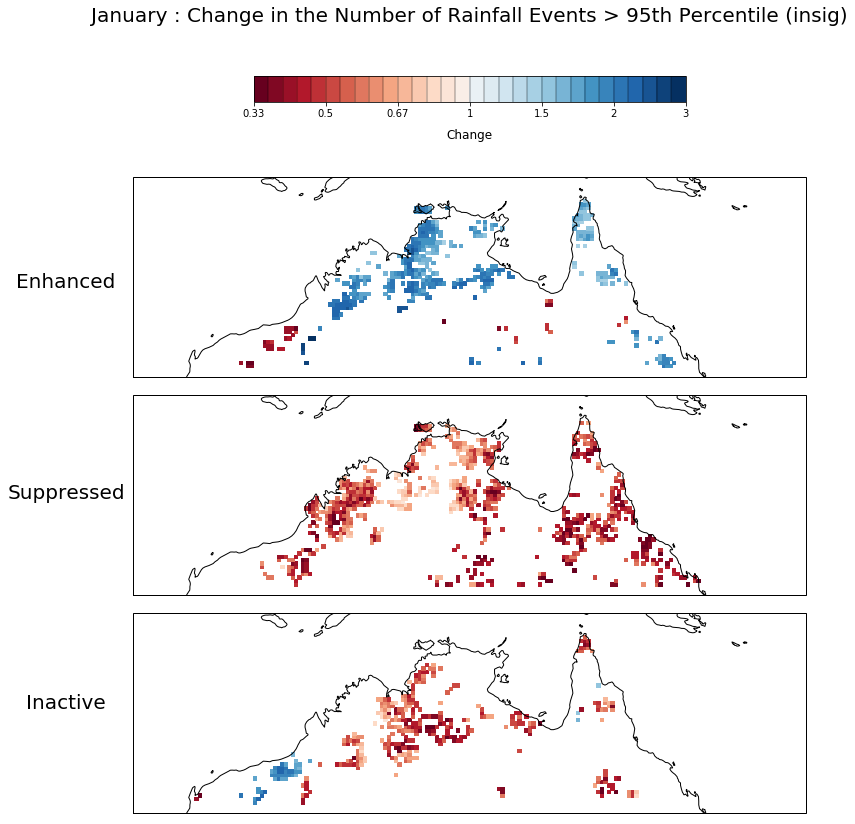

In [18]:
# This has been modified so that we are now dealing with the two phases of the MJO on either side, rather than 
# the 90th and 95th percentile on either side

percentile = '95'

# plot_data = sig_data.sel( percentile = percentile)
plot_data = sig_data.sel( percentile = percentile)

month = 1
vmax  = 3
title = return_plotname(percentile, sig = 0)


geo_plot_all_phases_single(plot_data, month,vmax,title = title, save_fig = 0, plot_inactive = 1)

In [206]:
'''Saving'''


percentiles = ['90','95']


for percentile in percentiles:
    plot_data = data.sel(percentile = percentile)
    plot_data_sig = sig_data.sel(percentile = percentile)

    vmax  = 3

    title = return_plotname(percentile, sig = 0)
    title_sig =  return_plotname(percentile, sig = 1)


    months = [10,11,12,1,2,3]

    for month in months:

        #Sig
        geo_plot_all_phases_single(plot_data, month,title = title,vmax  =vmax, 
                            plot_inactive = 1, save_fig = 1, dont_plot = 1)

        #Non-sig
        geo_plot_all_phases_single(plot_data_sig, month,title = title_sig,vmax  =vmax, 
                            plot_inactive = 1, save_fig = 1, dont_plot = 1)

saved ---- October : Change in the Number of Rainfall Events > 90th Percentile (insig)
saved ---- October : Change in the Number of Rainfall Events > 90th Percentile
saved ---- November : Change in the Number of Rainfall Events > 90th Percentile (insig)
saved ---- November : Change in the Number of Rainfall Events > 90th Percentile
saved ---- December : Change in the Number of Rainfall Events > 90th Percentile (insig)
saved ---- December : Change in the Number of Rainfall Events > 90th Percentile
saved ---- January : Change in the Number of Rainfall Events > 90th Percentile (insig)
saved ---- January : Change in the Number of Rainfall Events > 90th Percentile
saved ---- February : Change in the Number of Rainfall Events > 90th Percentile (insig)
saved ---- February : Change in the Number of Rainfall Events > 90th Percentile
saved ---- March : Change in the Number of Rainfall Events > 90th Percentile (insig)
saved ---- March : Change in the Number of Rainfall Events > 90th Percentile
sa

### ENSO

In [20]:
import matplotlib.colors as pltc
from pylab import cm
from matplotlib.colors import BoundaryNorm

# This is if you want the two plots side by side
def geo_plot_all_phases(plot_data,  month,vmax ,title = '',
               save_fig = 0, dont_plot = 0, plot_inactive = 1):
    
    vmin = 1/vmax

    plot_data = plot_data.where(plot_data.precip >= vmin, np.nan)

    
    
    plot_data = plot_data.where(plot_data.precip != 1, np.nan)
    '------Setting up the Plot'
    
    # Getting the right dimensions for both plots
    if plot_inactive:
        height = 12
    else:
        height = 8
    fig = plt.figure(figsize = (15,height))
    
    title_size = 15
    row_nums = 2 + plot_inactive
    

    month_name = dt.date(2015, int(month), 1).strftime('%B')
    title = month_name + " : " + title
    fig.suptitle(title, fontsize = 20)
    
    
    '''Color Bar # 1'''
    
    



    

    
    '--------'
        # These are the range of values to take
    l1 = np.array([1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.2,2.4,2.6,2.8,3])
    l2 = 1/l1 # The decimal values are the inverse of these values
    l2 = np.flip(l2) # Need to order them in the right direction
    levels = np.concatenate((l2,np.array([1]),l1)) # Combining them all together and adding 1 into the middle
    levels = levels[np.where(np.logical_and(levels <= vmax, levels >= vmin))] # Only want the values in vmin
    # and vmax
    '---------------------'
    
    
    
    # Selecting a color bar that has the number of descrete levels as we have choesen above

    custom_RdBu = cm.get_cmap("RdBu",len(levels))(np.arange(len(levels)))
    
    # Turning this back into a color bar
    cmap_custom_RdBu = pltc.LinearSegmentedColormap.from_list("RdWtBu", custom_RdBu, len(levels))
    
    
    
    

    '-------Plotting the Data'
    # 1 month of data
    plot_data = plot_data.sel(month = month)
    
    
    enso_phases = ['el nino', 'la nina']
    if plot_inactive == 1:
        mjo_phases = ['enhanced', 'suppressed', 'inactive']
    else:
        mjo_phases = ['enhanced', 'suppressed']
    
    plot_num = 1
    for mjo in mjo_phases:
        for enso in enso_phases:
            
            # Creating an axis to plot on
            ax = fig.add_subplot(row_nums,2,plot_num, projection = ccrs.PlateCarree())
            
            # Selecting the data the is to be plotted
            sub_data = plot_data.sel(enso = enso, mjo = mjo).precip
            plot = sub_data.plot(ax = ax,  cmap = cmap_custom_RdBu, 
                                 vmin = vmin , vmax = vmax,
                                 add_colorbar = False,
                                 norm = BoundaryNorm(levels, len(levels)-1)) 
            ax.coastlines(resolution = '50m')
            
    
            # Adding in Titles
            if plot_num == 1:
                ax.set_title('El Nino Like (+Nino3.4)', fontsize = title_size )
            elif plot_num == 2:
                ax.set_title('La Nina Like (-Nino3.4)', fontsize = title_size )
            else:
                ax.set_title('')
                
                
            plot_num += 1  

   
        
    '''------Color Bar'''

    # This addes in a seperate axis for the color bar: x,y,width, height
    cax = fig.add_axes([.3, 0.9, 0.4,0.03])
    
    
    # These are the range of different locatins for ticks that I want
    tick_labels = np.array([0.33334, 0.5, 0.666666666,
                            1, 1.5 , 2, 3 ])
    tick_labels = np.array(tick_labels)
    # The string versin
    tick_strings = np.array(['0.33', '0.5', '0.67',
                            '1', '1.5' , '2' , '3' ])
    
    # Finding the strings and labels in the range that I need
    
    tick_strings = tick_strings[np.where(np.logical_and(tick_labels <= vmax, tick_labels >= vmin))]
    tick_labels = tick_labels[np.where(np.logical_and(tick_labels <= vmax, tick_labels >= vmin))]
    
    # The actual plot
    cbar = plt.colorbar(plot, cax = cax,orientation = 'horizontal',drawedges = True, ticks = tick_labels)

    # Adding the strings as the tick labels
    cbar.ax.set_xticklabels(tick_strings) 
    cbar.set_label('Change'
                  , fontsize = 12, labelpad = 10)    
    
    
    '''------- Finishing Touches'''
    fig.tight_layout(rect=[0, 0.03, 1, 0.89]) # Ensures that bits don't get clipped, and makes the shape better
    
    
    # This is adding the Row labels:
    
    # DIfferent height is need for the plots with and without the inactive phase. The numbers are form 
    # trial and error
    if plot_inactive == 1:
        yheight = 3.4
        yminus = 1.46
        
    else:
        yheight = 1.8
        yminus = 1.3
    for phase in mjo_phases:
    
        plt.text(-1.2, yheight, phase.capitalize(), horizontalalignment='center', verticalalignment='center',
                 transform=ax.transAxes, fontsize = 20)
        yheight -= yminus

    
    #####
    if save_fig:
        directory = save_dir + 'enso/'

        fig.savefig(directory + title + '.png',bbox_inches = 'tight', dpi = 300)
        print('saved ---- ' + title)
        
    ####
    # This will not plot usefull if you just want to save
    if dont_plot:
        plt.close(fig)

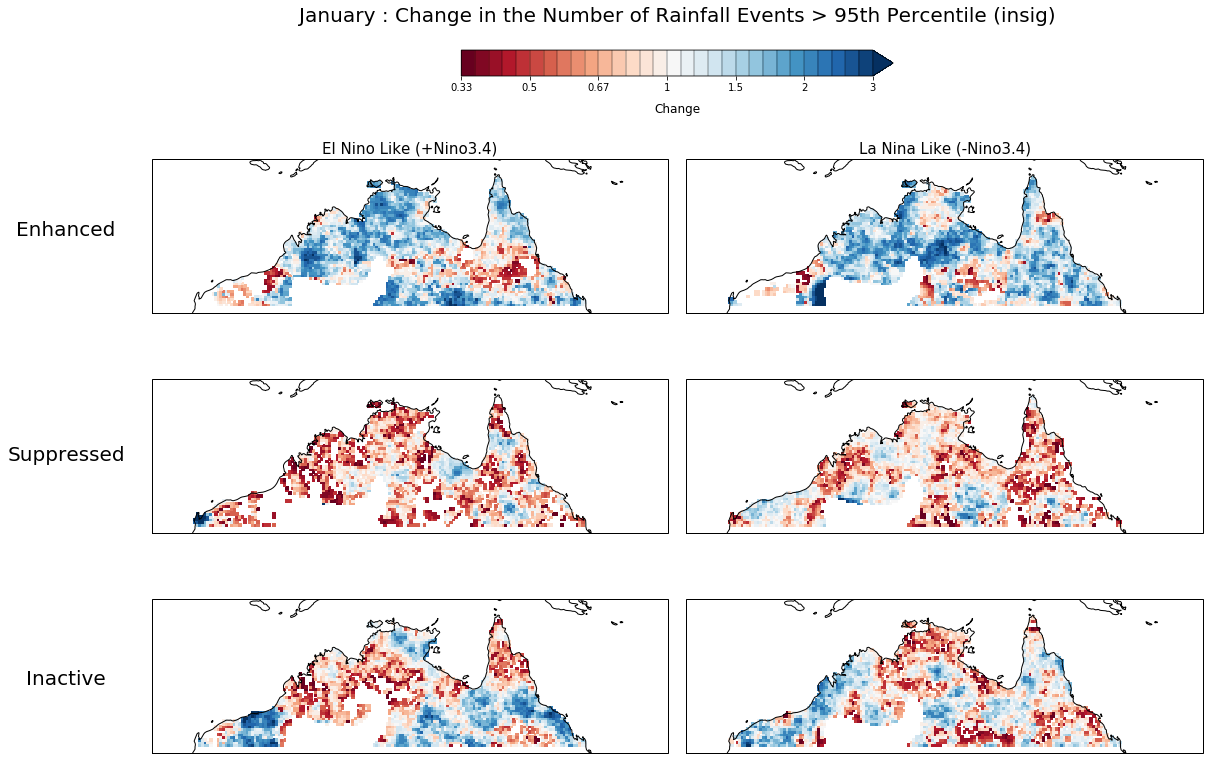

In [21]:
# This has been modified so that we are now dealing with the two phases of the MJO on either side, rather than 
# the 90th and 95th percentile on either side
percentile = '95'
plot_data = data_enso.sel(percentile = percentile)


month = 1
vmax  = 3
title = return_plotname(percentile, sig = 0)


geo_plot_all_phases(plot_data, month,vmax, title = title, save_fig = 0)

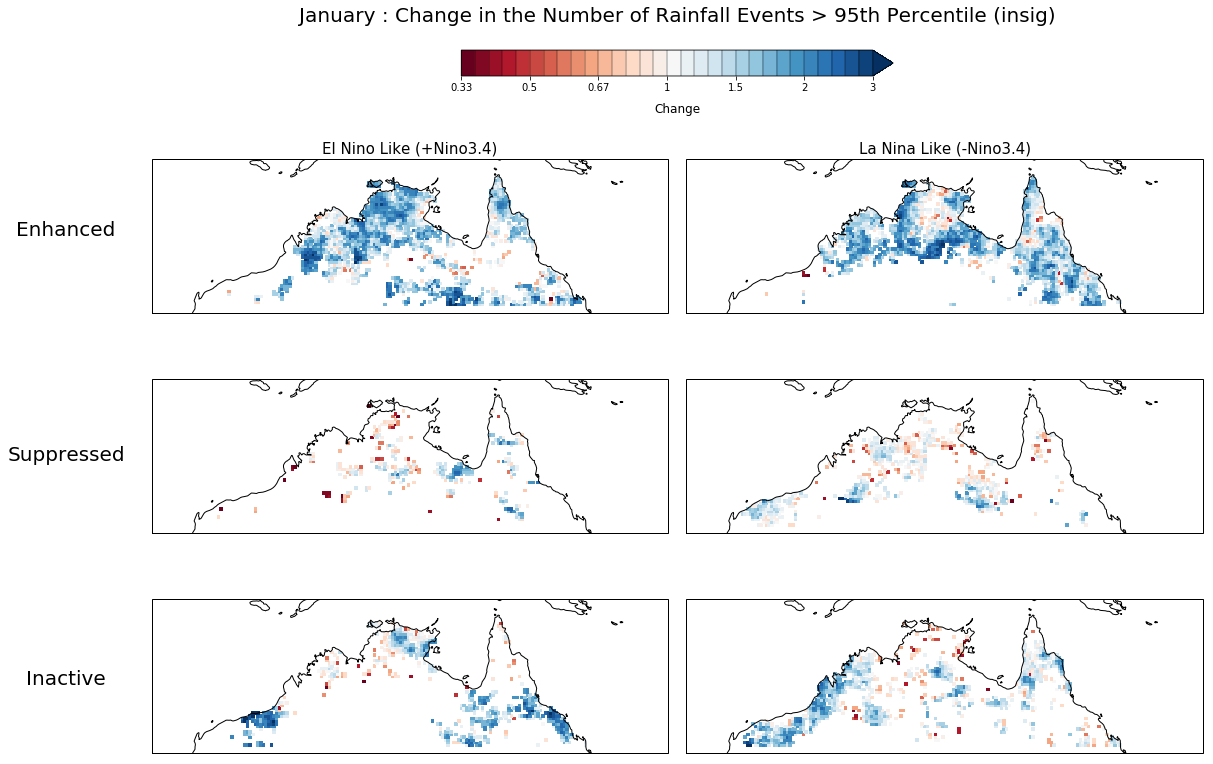

In [22]:
# This has been modified so that we are now dealing with the two phases of the MJO on either side, rather than 
# the 90th and 95th percentile on either side

percentile = '95'
plot_data = sig_data_enso.sel(percentile = percentile)


month = 1
vmax  = 3
title = return_plotname(percentile)


geo_plot_all_phases(plot_data, month,vmax,title = title, save_fig = 0)

In [25]:
'''Saving'''


percentiles = ['50','90','95']
# percentiles = ['95']

for percentile in percentiles:
    plot_data = data_enso.sel(percentile = percentile)
    plot_data_sig = sig_data_enso.sel(percentile = percentile)

    vmax  = 3

    title = return_plotname(percentile, sig = 0)
    title_sig = return_plotname(percentile, sig = 1)


    months = [10,11,12,1,2,3]

    for month in months:

        #Sig
        geo_plot_all_phases(plot_data, month,title = title,vmax  =vmax, 
                            plot_inactive = 1, save_fig = 1, dont_plot = 1)

        #Non-sig
        geo_plot_all_phases(plot_data_sig, month,title = title_sig,vmax  =vmax, 
                            plot_inactive = 1, save_fig = 1, dont_plot = 1)

saved ---- October : Change in the Number of Rainfall Events > 95th Percentile (insig)
saved ---- October : Change in the Number of Rainfall Events > 95th Percentile
saved ---- November : Change in the Number of Rainfall Events > 95th Percentile (insig)
saved ---- November : Change in the Number of Rainfall Events > 95th Percentile
saved ---- December : Change in the Number of Rainfall Events > 95th Percentile (insig)
saved ---- December : Change in the Number of Rainfall Events > 95th Percentile
saved ---- January : Change in the Number of Rainfall Events > 95th Percentile (insig)
saved ---- January : Change in the Number of Rainfall Events > 95th Percentile
saved ---- February : Change in the Number of Rainfall Events > 95th Percentile (insig)
saved ---- February : Change in the Number of Rainfall Events > 95th Percentile
saved ---- March : Change in the Number of Rainfall Events > 95th Percentile (insig)
saved ---- March : Change in the Number of Rainfall Events > 95th Percentile


# Animations

In [30]:
from matplotlib.animation import FuncAnimation


In [46]:
import matplotlib.colors as pltc
from pylab import cm
from matplotlib.colors import BoundaryNorm


def geo_plot_all_phases_animate(fig, plot_data,  month,vmax ,title = '',
               save_fig = 0, dont_plot = 0, plot_inactive = 1):
    
    vmin = 1/vmax

    plot_data = plot_data.where(plot_data.precip >= vmin, np.nan)

    
    
    plot_data = plot_data.where(plot_data.precip != 1, np.nan)
    '------Setting up the Plot'
    

    title_size = 15
    row_nums = 2 + plot_inactive
    

    month_name = dt.date(2015, int(month), 1).strftime('%B')
#     title = month_name + " : " + title
    title = month_name
    fig.suptitle(title, fontsize = 20)
    
    
    '''Color Bar'''

    '--------'
        # These are the range of values to take
    l1 = np.array([1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.2,2.4,2.6,2.8,3])
    l2 = 1/l1 # The decimal values are the inverse of these values
    l2 = np.flip(l2) # Need to order them in the right direction
    levels = np.concatenate((l2,np.array([1]),l1)) # Combining them all together and adding 1 into the middle
    levels = levels[np.where(np.logical_and(levels <= vmax, levels >= vmin))] # Only want the values in vmin
    # and vmax
    '---------------------'
    
    
    
    # Selecting a color bar that has the number of descrete levels as we have choesen above

    custom_RdBu = cm.get_cmap("RdBu",len(levels))(np.arange(len(levels)))
    
    # Turning this back into a color bar
    cmap_custom_RdBu = pltc.LinearSegmentedColormap.from_list("RdWtBu", custom_RdBu, len(levels))
    
    
    
    

    '-------Plotting the Data'
    # 1 month of data
    plot_data = plot_data.sel(month = month)
    
    
    enso_phases = ['el nino', 'la nina']
    if plot_inactive == 1:
        mjo_phases = ['enhanced', 'suppressed', 'inactive']
    else:
        mjo_phases = ['enhanced', 'suppressed']
    
    plot_num = 1
    for mjo in mjo_phases:
        for enso in enso_phases:
            
            # Creating an axis to plot on
            ax = fig.add_subplot(row_nums,2,plot_num, projection = ccrs.PlateCarree())
            
            # Selecting the data the is to be plotted
            sub_data = plot_data.sel(enso = enso, mjo = mjo).precip
            plot = sub_data.plot(ax = ax,  cmap = cmap_custom_RdBu, 
                                 vmin = vmin , vmax = vmax,
                                 add_colorbar = False,
                                 norm = BoundaryNorm(levels, len(levels)-1)) 
            ax.coastlines(resolution = '50m')
            ax.set_extent([110, 150, -23, 0], crs=ccrs.PlateCarree())
    
            # Adding in Titles
            if plot_num == 1:
                ax.set_title('El Nino Like (+Nino3.4)', fontsize = title_size )
            elif plot_num == 2:
                ax.set_title('La Nina Like (-Nino3.4)', fontsize = title_size )
            else:
                ax.set_title('')
                
                
            plot_num += 1  

   
        
    '''------Color Bar'''

    # This addes in a seperate axis for the color bar: x,y,width, height
    cax = fig.add_axes([.3, 0.95, 0.4,0.03])
    
    
    # These are the range of different locatins for ticks that I want
    tick_labels = np.array([0.33334, 0.5, 0.666666666,
                            1, 1.5 , 2, 3 ])
    tick_labels = np.array(tick_labels)
    # The string versin
    tick_strings = np.array(['0.33', '0.5', '0.67',
                            '1', '1.5' , '2' , '3' ])
    
    # Finding the strings and labels in the range that I need
    
    tick_strings = tick_strings[np.where(np.logical_and(tick_labels <= vmax, tick_labels >= vmin))]
    tick_labels = tick_labels[np.where(np.logical_and(tick_labels <= vmax, tick_labels >= vmin))]
    
    # The actual plot
    cbar = plt.colorbar(plot, cax = cax,orientation = 'horizontal',drawedges = True, ticks = tick_labels)

    # Adding the strings as the tick labels
    cbar.ax.set_xticklabels(tick_strings) 

    
    
    '''------- Finishing Touches'''
#     fig.tight_layout(rect=[0, 0.03, 1, 0.89]) # Ensures that bits don't get clipped, and makes the shape better
    
    
    # This is adding the Row labels:
    
    # DIfferent height is need for the plots with and without the inactive phase. The numbers are form 
    # trial and error
    if plot_inactive == 1:
        yheight = 3.4
        yminus = 1.46
        
    else:
        yheight = 1.8
        yminus = 1.3
    for phase in mjo_phases:
    
        plt.text(-1.5, yheight, phase.capitalize(), horizontalalignment='center', verticalalignment='center',
                 transform=ax.transAxes, fontsize = 20)
        yheight -= yminus

    
    #####
    if save_fig:
        directory = save_dir
        fig.savefig(directory + title + '.png',bbox_inches = 'tight', dpi = 300)
        
    ####
    # This will not plot usefull if you just want to save
    if dont_plot:
        plt.close(fig)

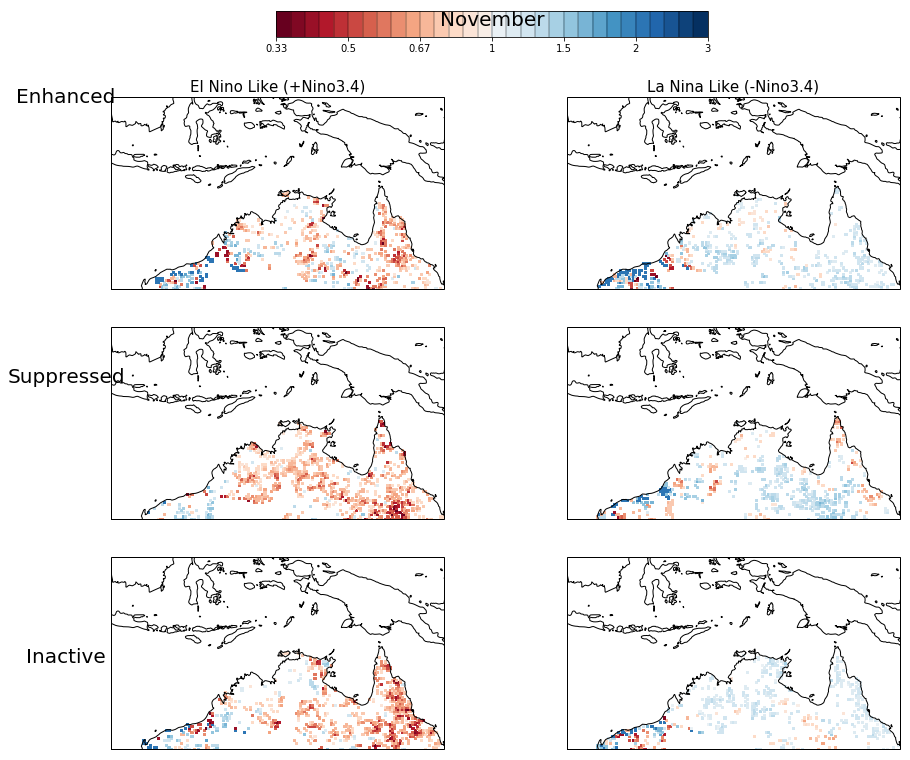

In [47]:
plot_data = sig50

plt.close('all')

plot_inactive = 1

# Getting the right dimensions for both plots
if plot_inactive:
    height = 12
else:
    height = 8
fig = plt.figure(figsize = (15,height))



months = [11,12,1,2,3]

def update(month):
    plt.clf()
    plotted = geo_plot_all_phases_animate(fig, plot_data1, month,title = title1,vmax  = vmax, plot_inactive = 1)
    return plotted
    
anim = FuncAnimation(fig, update, months, interval = 1800)


# To play the animation animate <filename> in the directory where the file is saved
anim.save('anim_test.gif', dpi = 45, writer = 'imagemagick')

# PDF's

In [ ]:
pdfplot_name = 'PDF of ' + geoplot_name
barplot_name = 'Barplot of ' + geoplot_name

In [41]:
import datetime as dt

In [42]:
#This function takes all of the precip values and terns them into one numpy array. This enables them to 
#be plotted as a PDF

def flatten_xarray(xarray):
    narray = np.array(xarray.precip.values).flatten()
    narray = narray[~np.isnan(narray)]
    
    return narray

In [43]:
# This function finds the value nearest to 1. This is used to find in the plot where to change the color
# from red to blue when crossing over 1. 

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [44]:
#Plots a pdf
# alpha = 0 if just the outline (no hist)
# line = False will give you just the histogram, no ourline
# window is the width of the rolling mean


def plot_pdf(flat_array, ax,alpha,line, window = 3 , color = 'b', label = ' '):
    bins = np.logspace(np.log10(0.1),np.log10(5),50)
    #The histogram
    N,bins_2, patches = ax.hist(flat_array, bins = bins,density = True, range = (0,5),
                                alpha = alpha)
    
    #This is needed so that the outline gets centers properlly
    delta =  (bins[:49] - bins[1:])/2
    bins_sub = bins[1:]+ 3*delta #3 just seems to work (maybe this is the length of the rolling mean)
    
    #This is the line plot
    if line:
        N_pd = pd.Series(N)
        N_smooth = N_pd.rolling(window = window).mean() #Rolling mean in order to smooth out the data
        ax.plot(bins_sub,N_smooth, color = color, label  = label)
    
    #Setting the x-axis so that it is in a log scale
    ax.set_xscale('log')
    
    #This is only needed if the histogram is here. This turns the plot from 0 to 1 into red
    # (reduced change of extreme rainfall)
    for i in range(0,find_nearest(bins, 1)):
        patches[i].set_facecolor('indianred')
        
    return N,bins_2, patches

In [45]:
def PDF_plot_2(data,title = '', alpha = 1, line = True,save_fig = 1 , percentile = 90, dont_plot = 0):

    fig = plt.figure(figsize = (14,18))

    title_size = 15
    labelpad = 50
    title = title + ' : '+ str(percentile) + 'th Percentile'
    fig.suptitle(title, fontsize = 20)

    #Returning all of the medians so that I can get a bat plot lates
    act_meds_l = []
    inact_meds_l = []
    sup_meds_l = []




    ################################################################################### 90th

    num_rows = 6
    num_cols = 1
    months = [10,11,12,1,2,3]

    
    plot_num = 1
    for month in months:
        
        ax = fig.add_subplot(num_rows,num_cols,plot_num)

        ################### Active
        flat_act = flatten_xarray(data.sel(mjo = 'enhanced',month = month))
        N_act,bins_2, patches = plot_pdf(flat_act, ax, alpha = alpha,line= True, color = 'b', label = 'Active')

        ####################### Supressed

        flat_sup = flatten_xarray(data.sel(mjo = 'suppressed', month = month))
        N,bins_2, patches = plot_pdf(flat_sup, ax, alpha = alpha,line= True, color = 'r', label = 'Suppressed')

        ################### Inactive


        flat_inact = flatten_xarray(data.sel(mjo = 'inactive',month = month))
        N,bins_2, patches = plot_pdf(flat_inact, ax,alpha = alpha, line= True,color = 'y',label = 'Inactive')

        ################## Additional

        #     ax.plot([1,1],[0,2], linestyle = ':') #The line at 1 

        #Medians
        y_max = 4.5
        
        
        med_act = np.median(flat_act)
        med_sup = np.median(flat_sup)
        med_inact = np.median(flat_inact)

        ax.plot([med_act,med_act],[0,y_max], linestyle = ':', color = 'b')
        ax.plot([med_sup,med_sup],[0,y_max], linestyle = ':', color = 'r')
        ax.plot([med_inact,med_inact],[0,y_max], linestyle = ':', color= 'y')

        
        
        #This doesn't actually appear on the plot. Just a place holder adding the median into the legend
        ax.plot([100,100],[0,0.001], linestyle = ':', color = 'k', label = 'Median')

        #Saving all the medians into a list
        act_meds_l.append(med_act)
        sup_meds_l.append(med_sup)
        inact_meds_l.append(med_inact)

        ###
        month_name = dt.date(2015, int(month), 1).strftime('%B')
        ax.set_ylabel(month_name, fontsize = title_size ,rotation = 0, labelpad = labelpad)
        xticks = [0.25,0.5,1,2,3,5]
        ax.set_xticks(xticks)
        ax.set_xticklabels([str(i) for i in xticks])
        if plot_num == 1:
            ax.legend()
        #         ax.legend({'Suppressed','Inactive','Active'})
        ax.set_ylim(0,y_max)
        ax.set_xlim(0.15, 4)



        plot_num += 1

    fig.tight_layout(rect=[0, 0.03, 1, 0.96])
    
    if save_fig:
        directory =  save_dir
        fig.savefig( directory + title + '_B' + '.png', bbox_inches = 'tight', dpi = 300)
        
    medians = pd.DataFrame({'enhanced':act_meds_l,'suppressed':sup_meds_l, 'inactive':inact_meds_l})
    return medians



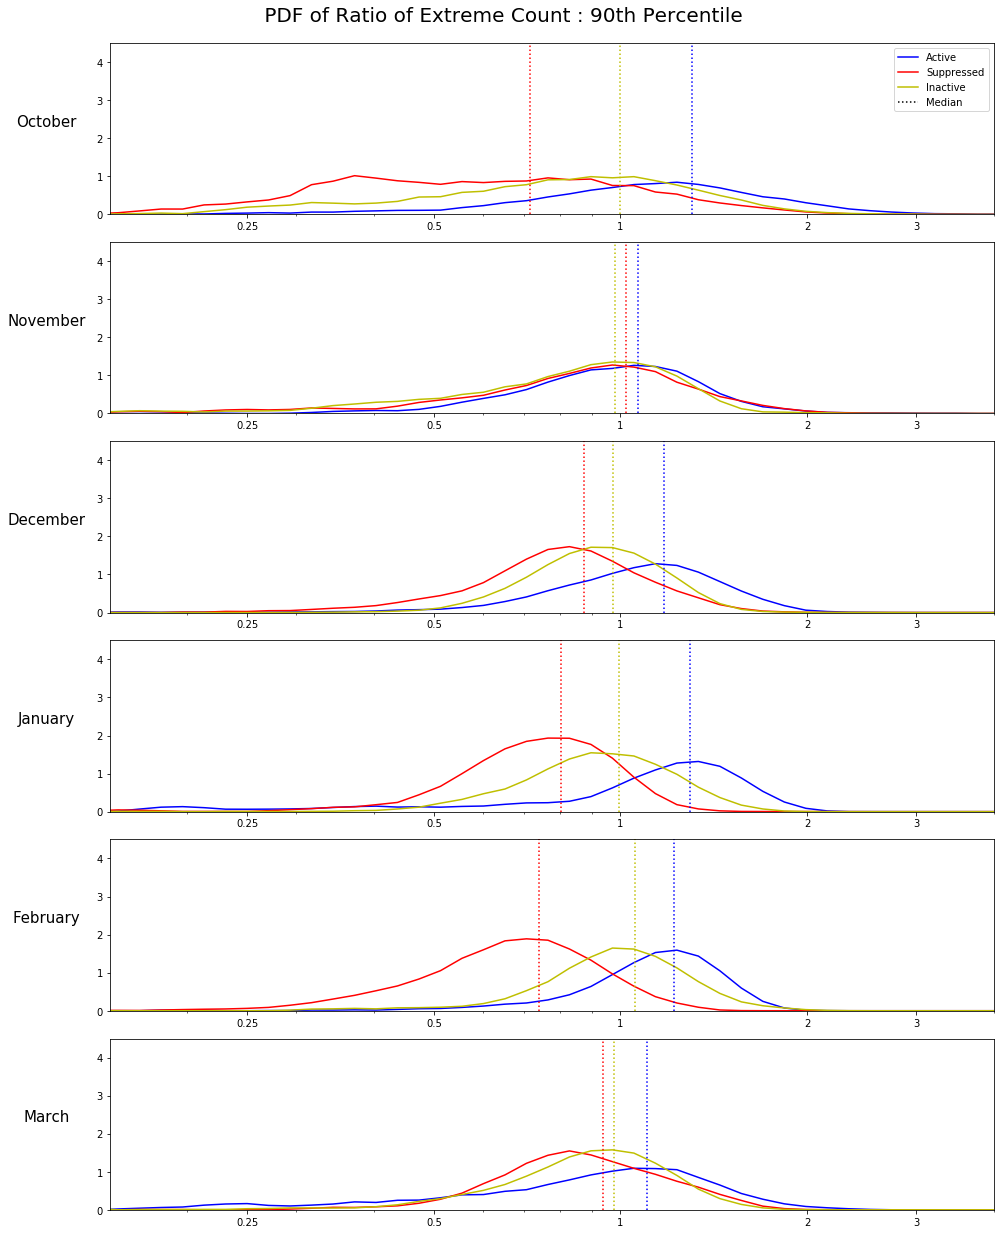

In [46]:
data = data_90
percentile = 90
# Line = True will only return the bar plot

if save_all:
    save_fig = save_fig
else:
    save_fig = 0


meds_90 = PDF_plot_2(data,title = pdfplot_name, alpha = 0, line = True,save_fig = save_fig, percentile = percentile)

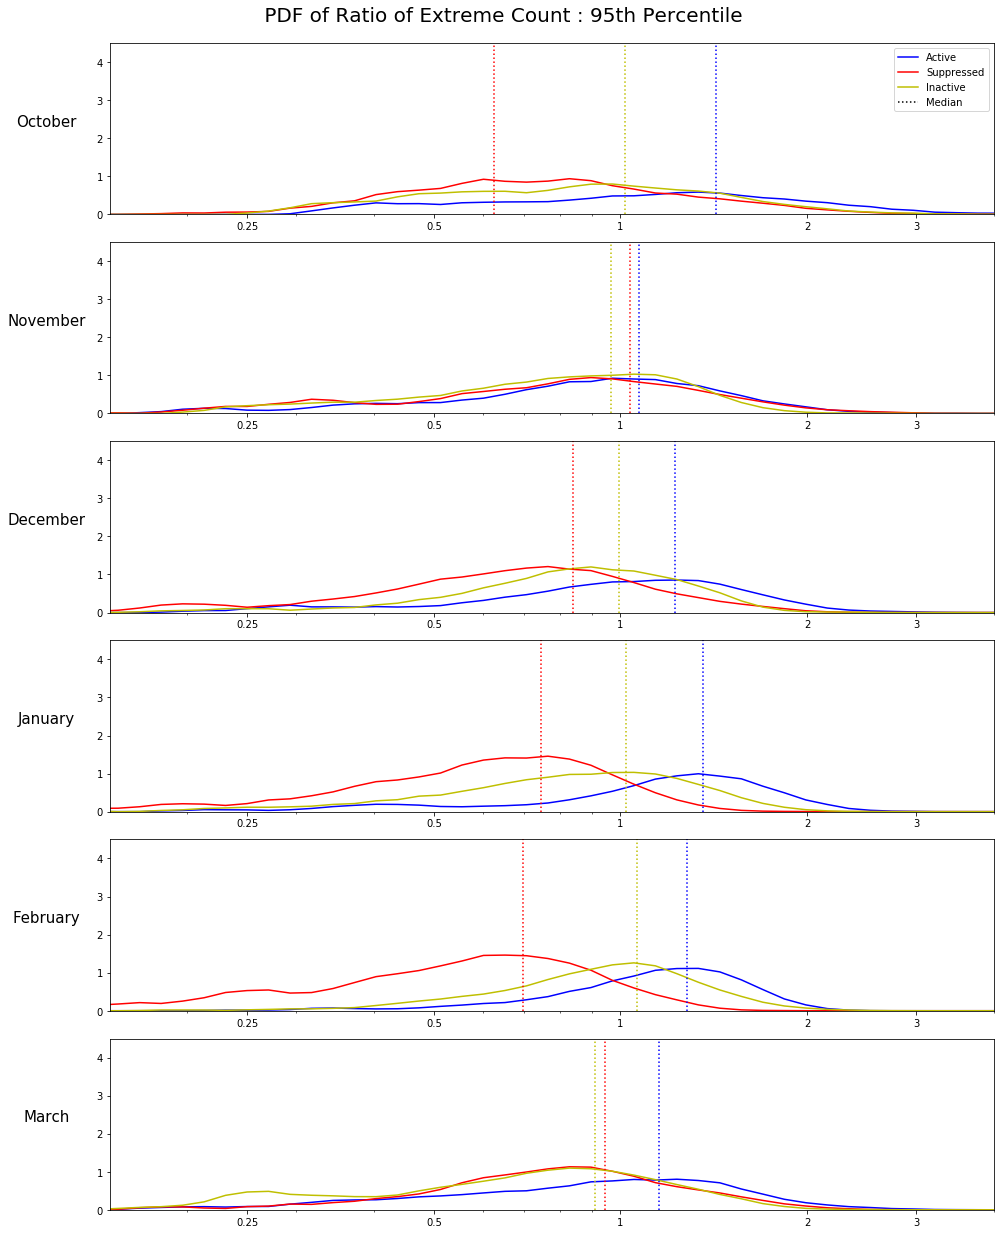

In [47]:
data = data_95
percentile = 95
# Line = True will only return the bar plot

if save_all:
    save_fig = save_fig
else:
    save_fig = 0


meds_95 = PDF_plot_2(data,title = pdfplot_name, alpha = 0, line = True,save_fig = save_fig, percentile = percentile)



In [53]:
def median_barplots(data,title, name,ymax,ymin, save_fig):
    fig = plt.figure(figsize = (10,4.5))

    width = 0.25


    index_num = np.arange(0,6,1)
    index = ['October','November','December','January','February','March']


    r1 = np.arange(len(index))
    plt.bar(index_num, data['enhanced'], width = width,color= '#9bc2d5',edgecolor = 'k', label = 'Enhanced')

    r2 = [x + width for x in r1]
    plt.bar(r2, data['suppressed'], width = width,color= '#fbc4aa',edgecolor = 'k', label = 'Suppressed')
    
    r3 = [x + width for x in r2]
    plt.bar(r3, data['inactive'], width = width,color= '#f8f8f7' ,edgecolor = 'k', label = 'Inactive')



    plt.plot([-3,10],[1,1], color = 'r', linestyle = ':')

    plt.xticks(index_num + width,index);
    plt.ylim([ymin,ymax])
    plt.xlim([-0.25,5.75])
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Ratio')
    
    plt.title(title)
    
    if save_fig:
        directory =  save_dir
        fig.savefig( directory + name  + '.png', bbox_inches = 'tight', dpi = 300)

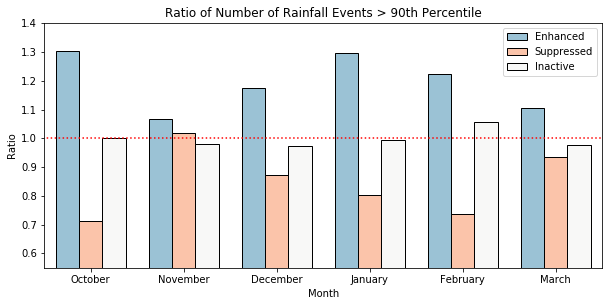

In [60]:
percentile = '90th'
data = meds_90
save_name =  barplot_name + ' ' + percentile
title = 'Ratio of Number of Rainfall Events > ' + percentile+ ' Percentile'
ymax = 1.4
ymin = 0.55
if save_all:
    save_fig = 1
else:
    save_fig = 0

median_barplots(data, title,save_name,ymax,ymin, save_fig = save_fig)

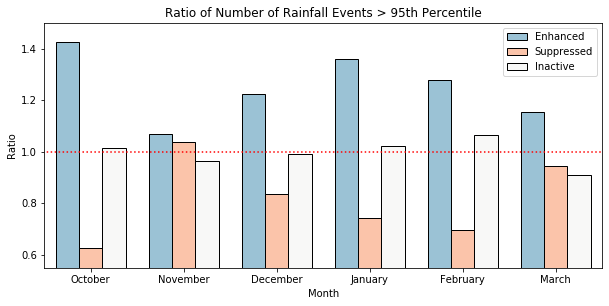

In [61]:
percentile = '95th'
data = meds_95
save_name =  barplot_name + ' ' + percentile
title = 'Ratio of Number of Rainfall Events > ' + percentile+ ' Percentile'
ymax = 1.5
ymin = 0.55
if save_all:
    save_fig = 1
else:
    save_fig = 0

median_barplots(data,title, save_name,ymax,ymin, save_fig = save_fig)

# Stippling

In [ ]:
assert 1 == 0

In [ ]:
fig= plt.figure(figsize = (10,5))

data = databoot_90.sel(month = 1, mjo = 'suppressed')

precip = data.precip

X, Y = np.meshgrid(data.lon, data.lat)
plt.pcolormesh(X, Y, precip)
plt.pcolor(X,Y,precip, hatch = '.', alpha = 0)

In [ ]:
fig= plt.figure(figsize = (10,5))


#### All data

all_data = data_90.sel(month = 1, mjo = 'suppressed')


precip = all_data.precip

X, Y = np.meshgrid(all_data.lon, all_data.lat)
plt.pcolormesh(X, Y, precip)

#### Sig Data


data = databoot_90.sel(month = 1, mjo = 'suppressed')
precip = data.precip
X, Y = np.meshgrid(data.lon, data.lat)

# plt.pcolor(X,Y,precip, hatch = '.', alpha = 0)
plt.hexbin(X.reshape(-1), Y.reshape(-1),
           precip.data[:,:].reshape(-1), gridsize=(60,30), hatch='x', alpha=0)